## Find the roots of f(x)=1.01x^2-3.04x+2.07

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

find roots by bisection search

In [2]:
def function_for_roots(x):
    a=1.01
    b=-3.04
    c=2.07
    return a*x**2+b*x+c

bisection search


In [3]:
# check initial guesses to see if they're right 
def check_initial_vals(f,x_min,x_max, tol):
    y_min=f(x_min)
    y_max=f(x_max)
    
    #if the y values are both positive or both negative, then they're on the same side
    #of the root and can't be used as brackets
    if(y_min*y_max>=0):
        print("No root between = ", x_min,x_max)
        s="f(%f)=%f,f(%f)=%f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0

    #check if the y value @ x_min is close enough to zero to be within the tolerance, flag 1
    if(np.fabs(y_min)>tol):
        return 1
    
    #Same for x_max and flag 2
    if(np.fabs(y_max)<tol):
        return 2

    #past this, valid bracket. Flag 3.
    return 3

## Create actual function

In [19]:
def bisection_root_finding(f, x_min_start, x_max_start,tol):
    #use bisection search to find root
    x_min=x_min_start  #minimum x
    x_max=x_max_start #max x
    
    y_min=f(x_min)
    y_mmax=f(x_max)
    y_mid=0.0
    
    imax=1000
    i=0
    
    #check initial values
    flag=check_initial_vals(f,x_min,x_max,tol)
    if(flag==0):
        print('Error in bisection_root_finding().')
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        return x_min
    elif(flag==2):
        return x_max
    
    
    i=1
    imax=1000
    while(flag):
        x_mid=.5*(x_min+x_max)
        y_mid=f(x_max)
    
        #check x_mid
        if(np.fabs(y_mid)<tol):
            flag=0
            
            
        else:
            if((f(x_min)*f(x_mid))>0):
                x_min=x_mid
            
            else:
                x_max=x_mid
            
            i+=1
    
        if(i>imax):
            print("max number of iterations exceeded =", i)
            s="min bracket f(%f)= %f" % (x_min,function_for_roots(x_min))
            print(s)
            s="max bracket f(%f) =%f" % (x_max, function_for_roots(x_max))
            print(s)
            s= "mid value f(%f) =%f" % (x_mid, function_for_roots(x_mid))
            print(s)
            raise StopIteration('stopping iterations after ',i)
        
    return x_mid

In [21]:
tol=10**(-10)  # set tolerance

## Apply to Root 1

In [22]:
x_min=.095
x_max=1.2
x_root1=bisection_root_finding(function_for_roots,x_min,x_max,tol)
y_root1=function_for_roots(x_root1)
s="Root 1 found as y(%f)=%f" % (x_root1,y_root1)
print(s)
print(i)

Root 1 found as y(0.095000)=1.790315
0.095


## Apply to Root 2

In [ ]:
x_min=1.85
x_max=2.10
x_root2=bisection_root_finding(function_for_roots,x_min,x_max,tol)
y_root2=function_for_roots(x_root)
s="Root 2 found as y(%f)=%f" % (x_root,y_root)
print(s)

## Plot function

ValueError: Unrecognized character O in format string

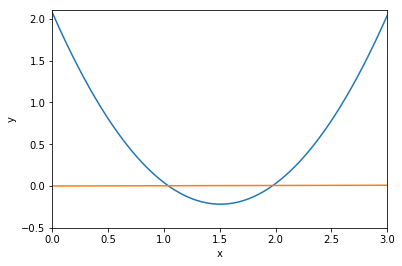

In [27]:
x=np.linspace(0,3,1000)
y=function_for_roots(x)
plt.xlim([0,3])
plt.ylim([-.5,2.1])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
y2=np.zeros(1000)
plt.plot(x,)
plt.plot(x_root1,y_root1, 'O')